In [12]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")  # this sets the style globally


In [13]:
#Load Dataset
df = pd.read_csv(r"C:\Users\BHARATHI P\Downloads\full_year_weather_dataset.csv")
df["date"]
print(df.columns)


Index(['date', 'temperature_c', 'humidity_%', 'wind_speed_kmph', 'rainfall_mm',
       'weather_condition'],
      dtype='object')


In [14]:

#Preview Dataset
print("First 5 rows:\n", df.head())
print("\nData Info:\n", df.info())


First 5 rows:
          date  temperature_c  humidity_%  wind_speed_kmph  rainfall_mm  \
0  01-01-2024           31.0          77               23            0   
1  02-01-2024           27.2          92               18           20   
2  03-01-2024           31.9          45                7           20   
3  04-01-2024           37.1          83               20            0   
4  05-01-2024           26.6          84                3           20   

  weather_condition  
0             Sunny  
1             Rainy  
2             Storm  
3             Sunny  
4             Rainy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               366 non-null    object 
 1   temperature_c      366 non-null    float64
 2   humidity_%         366 non-null    int64  
 3   wind_speed_kmph    366 non-null    int64  
 4   rainfall_mm

In [15]:
#Basic Statistics
print("Last 5 rows:\n", df.tail())
print(df.describe())

Last 5 rows:
            date  temperature_c  humidity_%  wind_speed_kmph  rainfall_mm  \
361  27-12-2024           37.2          67               10            0   
362  28-12-2024           27.3          50                9            0   
363  29-12-2024           30.4          43                3           20   
364  30-12-2024           32.1          54               14           12   
365  31-12-2024           25.6          45                8            5   

    weather_condition  
361             Sunny  
362            Cloudy  
363             Rainy  
364            Cloudy  
365            Cloudy  
       temperature_c  humidity_%  wind_speed_kmph  rainfall_mm
count     366.000000  366.000000       366.000000   366.000000
mean       28.053552   66.989071        12.800546     9.469945
std         5.680814   16.156593         6.908490    11.944985
min         8.600000   40.000000         2.000000     0.000000
25%        24.100000   53.000000         7.000000     0.000000
50%    

In [16]:
print(df.isnull().sum())

date                 0
temperature_c        0
humidity_%           0
wind_speed_kmph      0
rainfall_mm          0
weather_condition    0
dtype: int64


In [17]:
df_filled=df.fillna(0)

In [18]:
#Create NumPy arrays
temperature = df["temperature_c"].to_numpy()
humidity = df["humidity_%"].to_numpy()
rainfall = df["rainfall_mm"].to_numpy()

In [19]:
#Basic NumPy calculations
print("Average Temperature:", np.mean(temperature))
print("Max Temperature:", np.max(temperature))
print("Min Temperature:", np.min(temperature))

print("Average Humidity:", np.mean(humidity))
print("Total Rainfall:", np.sum(rainfall))


Average Temperature: 28.053551912568302
Max Temperature: 51.1
Min Temperature: 8.6
Average Humidity: 66.98907103825137
Total Rainfall: 3466


In [20]:
#Group by weather condition
condition_stats = df.groupby("weather_condition")[
    ["temperature_c", "humidity_%", "rainfall_mm"]
].mean()

print(condition_stats)



                   temperature_c  humidity_%  rainfall_mm
weather_condition                                        
Cloudy                 27.850833   66.533333     9.783333
Rainy                  27.770423   67.000000     7.816901
Storm                  28.733333   70.500000    15.833333
Sunny                  28.237857   66.707143    10.335714
Windy                  28.555172   69.482759     6.724138


In [21]:
#Daily temperature change
df["temp_change"] = df["temperature_c"].diff()
df.head()

,date,temperature_c,humidity_%,wind_speed_kmph,rainfall_mm,weather_condition,temp_change
0,01-01-2024,31.0,77,23,0,Sunny,NaN
1,02-01-2024,27.2,92,18,20,Rainy,-3.8
2,03-01-2024,31.9,45,7,20,Storm,4.7
3,04-01-2024,37.1,83,20,0,Sunny,5.2
4,05-01-2024,26.6,84,3,20,Rainy,-10.5


In [ ]:
monthly_avg_temp = df.groupby("month")["temperature_c"].mean()
print(monthly_avg_temp)



month
1     26.796774
2     27.368966
3     28.096774
4     28.010000
5     27.412903
6     29.513333
7     28.932258
8     27.851613
9     27.286667
10    28.387097
11    29.596667
12    27.416129
Name: temperature_c, dtype: float64


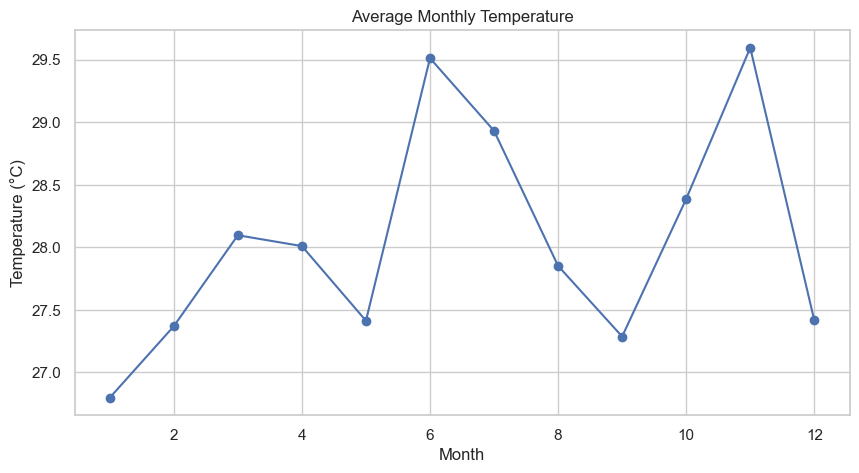

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(monthly_avg_temp.index, monthly_avg_temp.values, marker='o')
plt.title("Average Monthly Temperature")
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.show()



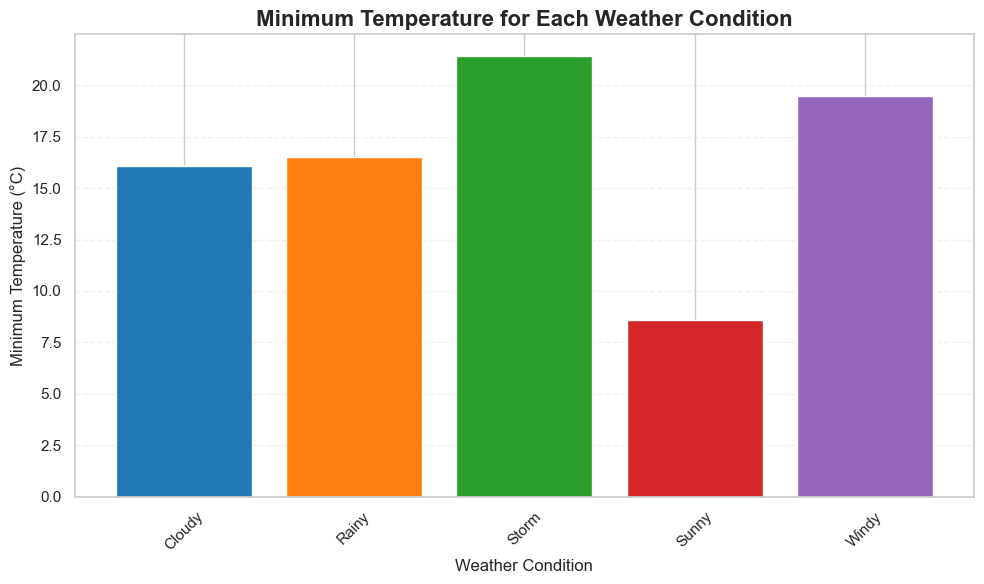

In [ ]:
#Bar Chart – Minimum Temperature
min_temp = df.groupby("weather_condition")["temperature_c"].min()

plt.figure(figsize=(10,6))

# Colorful palette
colors = sns.color_palette("tab10", len(min_temp))

plt.bar(min_temp.index, min_temp.values, color=colors)

plt.title("Minimum Temperature for Each Weather Condition", fontsize=16, fontweight="bold")
plt.xlabel("Weather Condition", fontsize=12)
plt.ylabel("Minimum Temperature (°C)", fontsize=12)

plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.3)

plt.tight_layout()
plt.show()




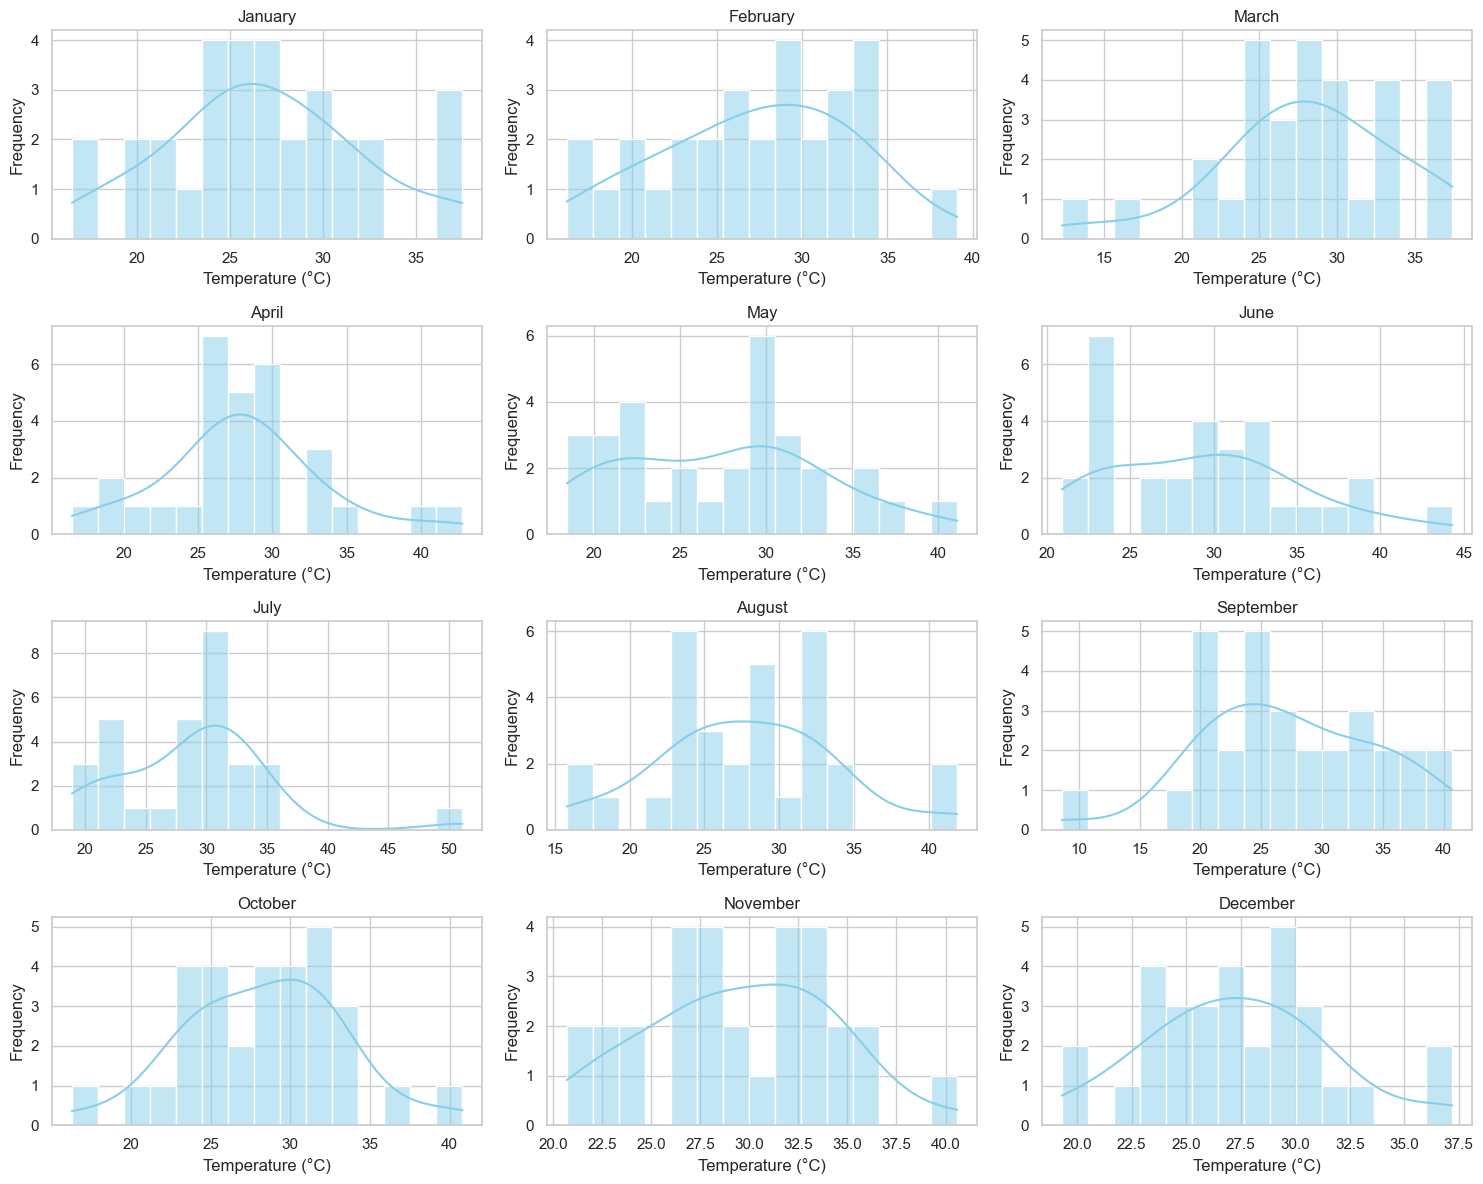

In [ ]:
# Order months correctly
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

# Plot month-wise histograms
plt.figure(figsize=(15,12))

for i, month in enumerate(month_order, 1):
    plt.subplot(4, 3, i)
    month_data = df[df["month"] == month]["temperature_c"]

    sns.histplot(month_data, bins=15, kde=True, color="skyblue")
    plt.title(month)
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


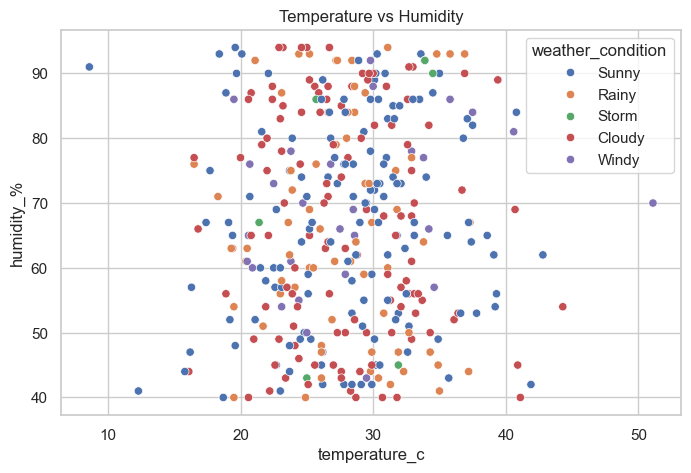

In [ ]:
#Scatter Plot – Temperature vs Humidity 
plt.figure(figsize=(8,5)) 
sns.scatterplot(data=df, x="temperature_c", y="humidity_%", hue="weather_condition")
plt.title("Temperature vs Humidity") 
plt.show() 

<Figure size 1200x600 with 0 Axes>

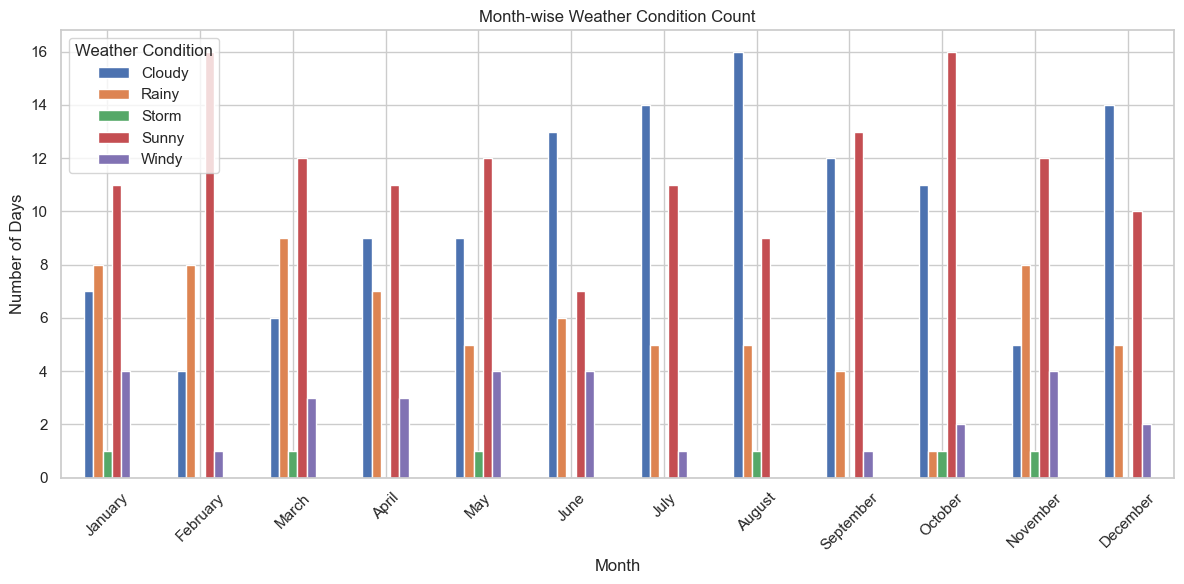

In [ ]:
# Ensure date column is in datetime format
df["date"] = pd.to_datetime(df["date"])

# Extract month name
df["month"] = df["date"].dt.strftime("%B")

# Sort months in calendar order
month_order = ["January","February","March","April","May","June",
               "July","August","September","October","November","December"]

# Count occurrences of each weather condition per month
month_weather_count = df.groupby(["month", "weather_condition"]).size().unstack().reindex(month_order)

# Plot
plt.figure(figsize=(12,6))
month_weather_count.plot(kind="bar", figsize=(12,6))

plt.title("Month-wise Weather Condition Count")
plt.xlabel("Month")
plt.ylabel("Number of Days")
plt.xticks(rotation=45)
plt.legend(title="Weather Condition")
plt.tight_layout()
plt.show()


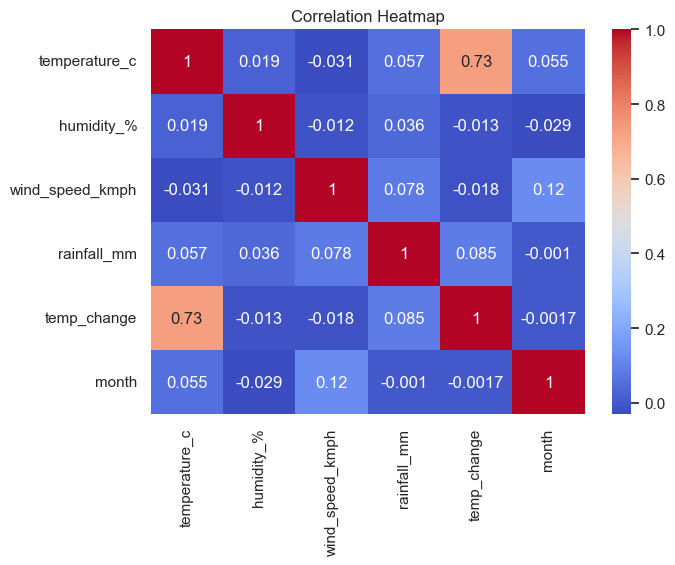

In [ ]:
#Heatmap – Correlation
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


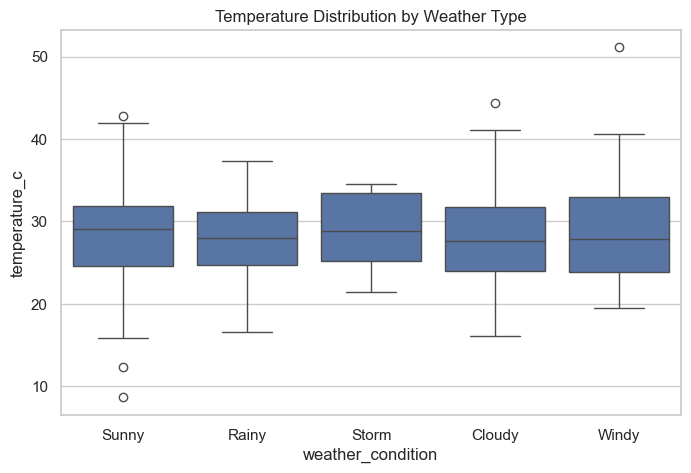

In [ ]:
#Boxplot – Weather Condition vs Temperature
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="weather_condition", y="temperature_c")
plt.title("Temperature Distribution by Weather Type")
plt.show()


In [ ]:
#Final Insights
print("Hottest Day: ", df.loc[df['temperature_c'].idxmax()])
print("Most Humid Day: ", df.loc[df['humidity_%'].idxmax()])
print("Rainiest Day: ", df.loc[df['rainfall_mm'].idxmax()])


Hottest Day:  date                 2024-07-28 00:00:00
temperature_c                       51.1
humidity_%                            70
wind_speed_kmph                       22
rainfall_mm                            5
weather_condition                  Windy
temp_change                         20.0
month                                  7
Name: 209, dtype: object
Most Humid Day:  date                 2024-03-21 00:00:00
temperature_c                       26.7
humidity_%                            94
wind_speed_kmph                        5
rainfall_mm                            0
weather_condition                  Rainy
temp_change                         10.6
month                                  3
Name: 80, dtype: object
Rainiest Day:  date                 2024-01-12 00:00:00
temperature_c                       25.2
humidity_%                            60
wind_speed_kmph                        6
rainfall_mm                           35
weather_condition                  Rainy
tem